In [16]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
tf.__version__
keras.__version__

'3.6.0'

In [30]:
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [31]:
X_train_full.shape

(60000, 28, 28)

In [21]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [22]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [23]:
model = keras.models.Sequential() 
model.add(keras.layers.Flatten(input_shape=[28, 28])) 
model.add(keras.layers.Dense(300, activation="relu")) 
model.add(keras.layers.Dense(100, activation="relu")) 
model.add(keras.layers.Dense(10, activation="softmax"))

C:\Users\hsuik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [32]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9211 - loss: 0.2212 - val_accuracy: 0.8828 - val_loss: 0.3221
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9212 - loss: 0.2193 - val_accuracy: 0.8922 - val_loss: 0.2976
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9239 - loss: 0.2117 - val_accuracy: 0.8936 - val_loss: 0.2974
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9256 - loss: 0.2105 - val_accuracy: 0.8916 - val_loss: 0.2959
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9251 - loss: 0.2068 - val_accuracy: 0.8926 - val_loss: 0.3016
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9287 - loss: 0.2025 - val_accuracy: 0.8916 - val_loss: 0.3027
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9294 - loss: 0.1984 - val_accuracy: 0.8986 - val_loss: 0.2975
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9311 - loss: 0.1962 - 

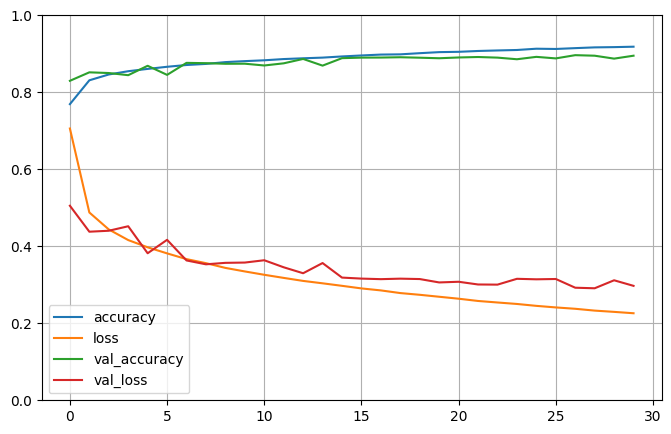

In [28]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [33]:
X_test = X_test / 255.0
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8822 - loss: 0.3685


[0.35730546712875366, 0.8838000297546387]

using the model to make predictions (306 (book) or 336 (web))